In [1]:
!pip install pydot -- in notebook
#sudo apt install graphviz -- in terminal

ERROR: Could not find a version that satisfies the requirement in (from versions: none)
ERROR: No matching distribution found for in


In [2]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU') #to use CPU instead of GPU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm

In [3]:
boston = tf.keras.datasets.boston_housing

In [4]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [5]:
boston_data = boston.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((404, 13), (404,), (102, 13), (102,))

In [8]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13, ), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])

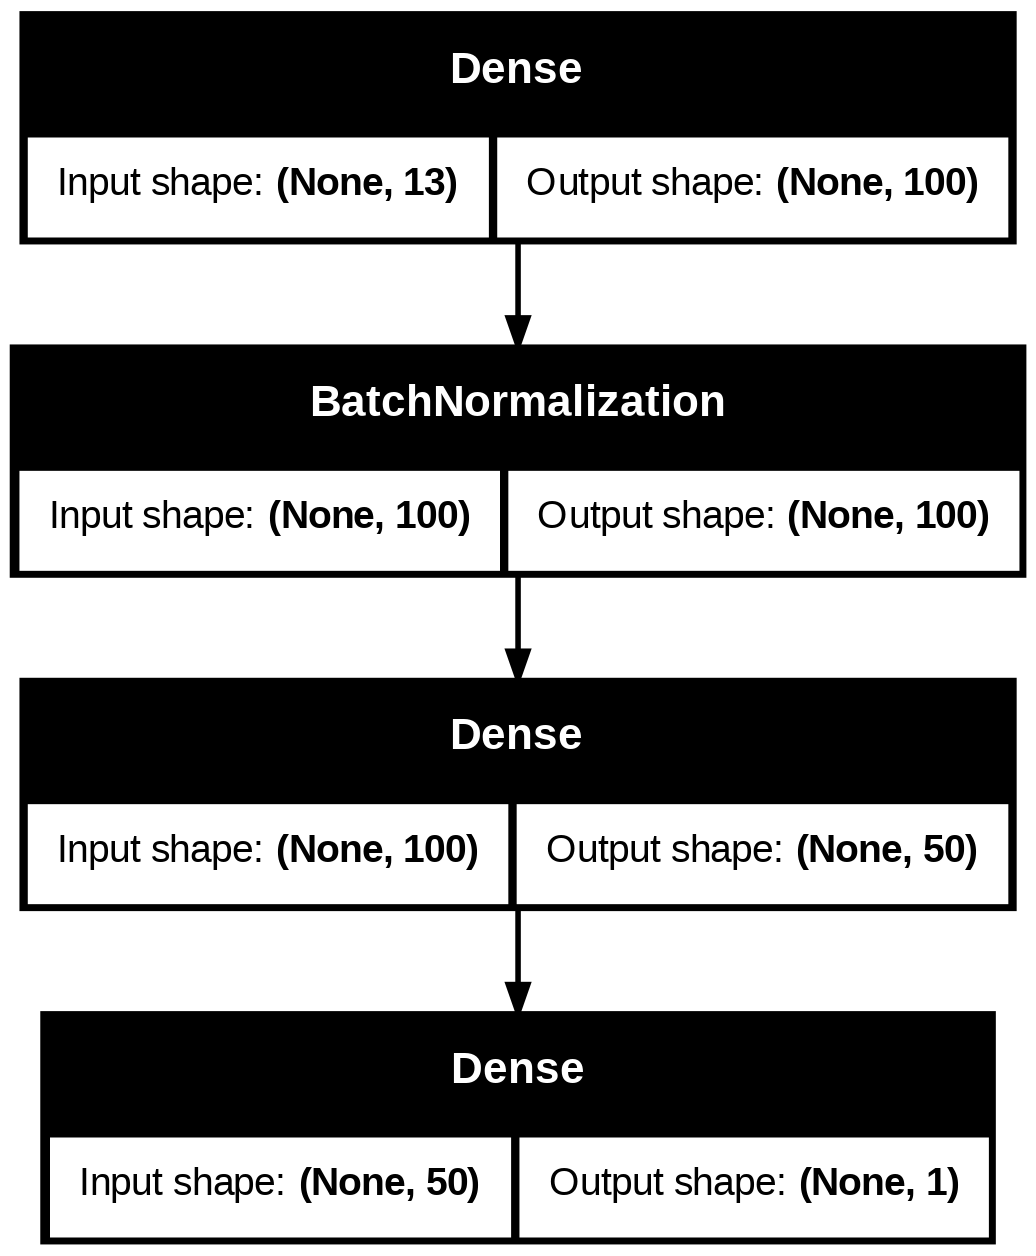

In [10]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)               │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-3 (BatchNormalization)  │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden-layer-4 (Dense)               │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output-layer (Dense)                 │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [12]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [13]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 566.2610 - mae: 22.1866 - val_loss: 2195.4170 - val_mae: 44.1316
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 545.0226 - mae: 22.0348 - val_loss: 865.3286 - val_mae: 27.8704
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 518.8692 - mae: 21.3549 - val_loss: 763.2159 - val_mae: 26.4279
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 507.6797 - mae: 21.1946 - val_loss: 827.6428 - val_mae: 27.5940
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 473.5003 - mae: 20.6118 - val_loss: 738.0662 - val_mae: 26.1877
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 440.9617 - mae: 19.6571 - val_loss: 462.5768 - val_mae: 20.6089
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 308.8321 - mae: 16.4774 - val_loss: 542.9050 - val_mae: 22.3664
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 204.8676 - mae: 12.7731 - val_loss: 257.8780 - val_mae: 14.9512
Epoch 9/20
13/1

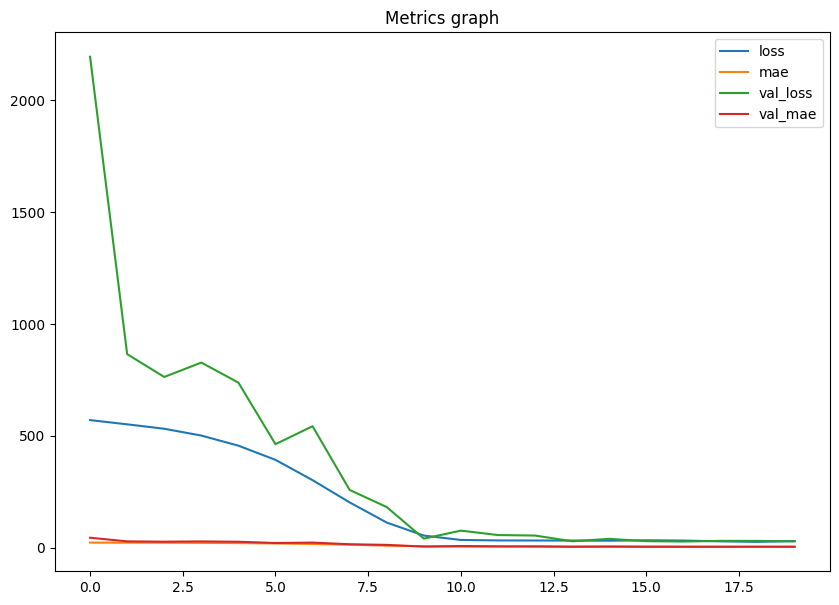

In [14]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [15]:
y_pred = model.predict(x_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


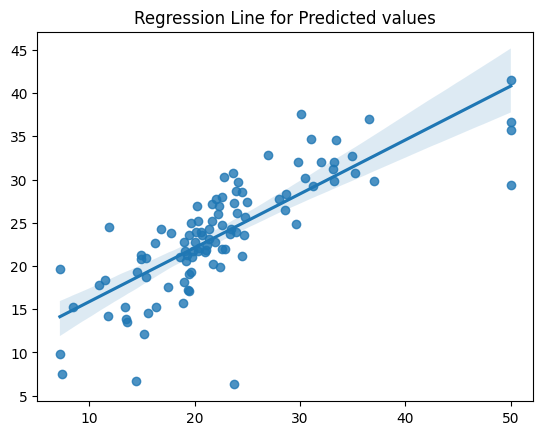

In [16]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [17]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [18]:
regression_metrics_display(y_test, y_pred)

MAE is 3.7990686248330507
MSE is 27.91156142341494
R2 score is 0.60799476381759
